In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from scipy import optimize
import os
import DSH
from DSH import Kernel
from DSH import MIfile as MI
from DSH import MIstack as MIs
from DSH import IOfunctions as iof
from DSH import SALS as LS

import logging
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)
logger = logging.getLogger('matplotlib')
logger.setLevel(logging.WARNING)
logging.info('SALS tutorial started')

INFO:root:SALS tutorial started


# Small Angle Light Scattering (SALS) analysis

### 1. Locating analysis input

DEBUG:root:MIfile object created with filename D:\Data\Arnaud\240112\53L_0.2p\001_DLS_LARGEQ.raw
DEBUG:root:MIfile - Metadata filename automatically generated: D:\Data\Arnaud\240112\53L_0.2p\001_DLS_LARGEQ_metadata.ini
DEBUG:root:Now loading MIfile metadata (from filename: D:\Data\Arnaud\240112\53L_0.2p\001_DLS_LARGEQ_metadata.ini)
DEBUG:root:Loading config file D:\Data\Arnaud\240112\53L_0.2p\001_DLS_LARGEQ_metadata.ini (1 sections, 6 keys)
DEBUG:root:Now loading MIfile.MetaData from Config object. Available sections: ['MIfile']
DEBUG:root:Appending input dictionary to section ROIs
INFO:root:Set 1 valid ROIs
DEBUG:root:2000 image times loaded (Image number: 2000)
DEBUG:root:Set one single exposure time: 0.5
DEBUG:root:MaskCoords created with
	- 19 first coords from 49.24 (+- 4.24) to 1104.78 (+- 95.22) and
	- 1 second coords from 0.0 (+- 3.15) to 0.00 (+- 3.15)
DEBUG:root:19 binary masks created with shape (1088, 2040)
DEBUG:root:Appending input dictionary to section ROIs
INFO:root:Set


|-----------------|
|   SALS class:   |
|-----------------+---------------
| Input           : MIfile (D:\Data\Arnaud\240112\53L_0.2p\001_DLS_LARGEQ.raw), 2000 images
| Center position : [1225, 315]
| ROIs            : 19 (19 valid, 0 empty)
| Exposure times  : 1, from 0.5 to 0.5
|-----------------+---------------


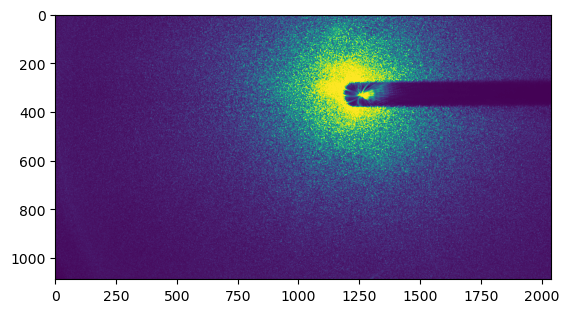

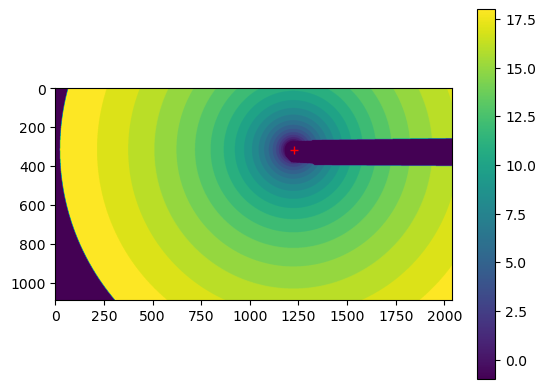

In [12]:
#---------------------------------
froot = r'D:\Data\Arnaud\240112\53L_0.2p'
fname_prefix = '001_DLS_LARGEQ'
MIinput = MI.MIfile(os.path.join(froot, fname_prefix+'.raw'))
px_mask = MI.ReadBinary(os.path.join(froot, 'px_mask.raw'), MIinput.ImageShape(), 'B') # <-- mask to be drawn for each experiment
ROIs = [np.geomspace(45, 1200, 20), None] # <-- [radial_intervals, angular_intervals]
center_pos = [1225, 315] # <-- transmitted beam position to be updated each experiment
#---------------------------------

Img_times = iof.LoadImageTimes(os.path.join(froot, fname_prefix+'_imgTimes.dat'), usecols=3, skiprows=1)
exp_times = np.loadtxt(os.path.join(froot, fname_prefix+'_exptimes.dat'))
SALS_analyzer = LS.SALS(MIinput, centerPos=center_pos, ROIslices=ROIs, maskRaw=px_mask, imgTimes=Img_times, expTimes=exp_times)

MIinput.OpenForReading()
plt.imshow(MIinput.GetImage(30))

print(SALS_analyzer)
plt.figure()
plt.imshow(SALS_analyzer.ROIs)
plt.plot(*SALS_analyzer.centerPos, 'r+')
plt.colorbar()

### 2. Running Analysis

In [13]:
%%time
SALS_analyzer.doDLS(os.path.join(froot, fname_prefix + '_out'), lagtimes=[1, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 24, 28, 32, 36, 40, 44, 48, 52, 56, 60, 70, 80, 90, 100, 120, 140, 160, 180, 200, 220, 240, 280, 320, 360, 400, 440, 480, 520, 560, 600, 640, 680, 720, 760, 800, 840, 880, 920, 960, 1000, 1080, 1160, 1240, 1320, 1400, 1480, 1560, 1640, 1720, 1800], g2m1_averageN=500)

Created folder: D:\Data\Arnaud\240112\53L_0.2p\001_DLS_LARGEQ_out


INFO:root:ROIproc.doDLS Analysis started! Input data is 2000 images (2000 times, 1 exposure times)
INFO:root:Analysis will resolve 19 ROIs and DLS will be performed on 2000 reference times and 62 lagtimes. Output will be saved in folder D:\Data\Arnaud\240112\53L_0.2p\001_DLS_LARGEQ_out
INFO:root:Now starting with SLS...
DEBUG:root:ROIproc.doSLS: output saved
DEBUG:root:ROIproc.doSLS analysis returned: raw data (shape: (2000, 1, 19)), Iavg data (shape: (2000, 19)), exptime data (shape: (2000, 19)), buffer images (shape (2000, 1088, 2015))
INFO:root:SLS analysis completed. Now doing DLS (1 exposure times, 2000 time points, 62 lagtimes)
INFO:root:Now performing DLS on 0-th exposure time. Using image range [0, 2000, 1] (2000 images)
INFO:root:Contrast (d0) processed
INFO:root:Lagtime 1/61 (d1) completed
INFO:root:Lagtime 2/61 (d2) completed
INFO:root:Lagtime 3/61 (d4) completed
INFO:root:Lagtime 4/61 (d6) completed
INFO:root:Lagtime 5/61 (d8) completed
INFO:root:Lagtime 6/61 (d10) complete

### 3. Visualizing analysis output

DEBUG:root:DSH.IOfunctions.OpenG2M1s: 0 g2-1 functions loaded from 0 ROIs found in folder D:\Data\Arnaud\240112\53L_0.2p\out


IndexError: list index out of range

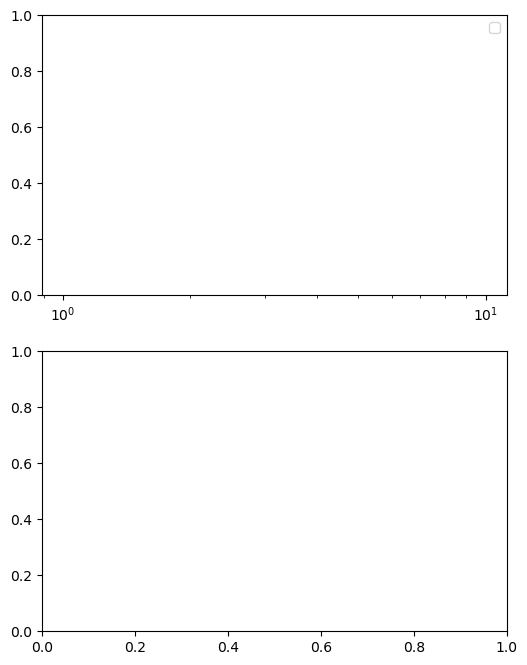

In [8]:
g2m1_data, lagtimes, imgtimes, ROI_list, exptime_list = iof.OpenG2M1s(os.path.join(froot, 'out'))
fig, ax = plt.subplots(nrows=2, figsize=(6, 8))
tidx=0
for i in range(len(g2m1_data)):
    ax[0].plot(lagtimes[i][tidx][1:], g2m1_data[i][tidx][1:], label='ROI'+str(ROI_list[i]).zfill(3)+'_e'+str(exptime_list[i]).zfill(2)+'_t={0:.3f}'.format(imgtimes[i][tidx]))
ax[0].set_xscale('log')
ax[0].legend()
ridx=-1
for i in range(len(g2m1_data[ridx])):
    ax[1].plot(lagtimes[ridx][i][1:], g2m1_data[ridx][i][1:], label='ROI'+str(ROI_list[ridx]).zfill(3)+'_e'+str(exptime_list[ridx]).zfill(2)+'_t={0:.3f}'.format(imgtimes[ridx][i]))
ax[1].set_xscale('log')
ax[1].legend()
ax[1].set_xlabel(r'$\tau$ [s]')
ax[0].set_ylabel(r'$g_2-1$')
ax[1].set_ylabel(r'$g_2-1$')

### 4: Run new analysis from config file

DEBUG:root:Loading config file U:\230606_testDLS\out\SALSconfig_modif.ini (8 sections, 40 keys)
DEBUG:root:Config.LoadConfig() assuming that input is of Config type (8 sections)
INFO:root:ROIproc.LoadFromConfig reading configuration from Config object (8 sections) -- Root folder: U:\230606_testDLS\out -- version 2.0, generated by SALS.doDLS on 06/08/2023, 11:46:39
DEBUG:root:MIfile object created with filename U:\230606_testDLS\007_DLS.raw
DEBUG:root:Now loading MIfile metadata (dict with 8 keys)
DEBUG:root:Appending input dictionary to section MIfile
DEBUG:root:Now loading MIfile.MetaData from Config object. Available sections: ['MIfile', 'settings']
DEBUG:root:ROIproc.LoadFromConfig loading MIfile U:\230606_testDLS\007_DLS.raw (metadata: {'hdr_len': '0', 'px_format': 'B', 'fps': '10', 'px_size': '1', 'shape': '[240, 1088, 2040]', 'comments': 'filename: D:\\Data\\Louanne\\230606\\007_DLS_metadata.ini', 'is_stack': 'False', 'filename': 'U:\\230606_testDLS\\007_DLS.raw'})
DEBUG:root:ROI

Created folder: U:\230606_testDLS\out\reproc


INFO:root:ROIproc.doDLS Analysis started! Input data is 240 images (240 times, 1 exposure times)
INFO:root:Analysis will resolve 4 ROIs and DLS will be performed on 240 reference times and 12 lagtimes. Output will be saved in folder U:\230606_testDLS\out\reproc
INFO:root:Now starting with SLS...
DEBUG:root:ROIproc.doSLS: output saved
DEBUG:root:ROIproc.doSLS analysis returned: raw data (shape: (240, 1, 4)), Iavg data (shape: (240, 4)), exptime data (shape: (240, 4)), buffer images (shape (240, 1088, 1455))
INFO:root:SLS analysis completed. Now doing DLS (1 exposure times, 240 time points, 12 lagtimes)
INFO:root:Now performing DLS on 0-th exposure time. Using image range [0, 240, 1] (240 images)
INFO:root:Contrast (d0) processed
INFO:root:Lagtime 1/11 (d1) completed
INFO:root:Lagtime 2/11 (d2) completed
INFO:root:Lagtime 3/11 (d4) completed
INFO:root:Lagtime 4/11 (d6) completed
INFO:root:Lagtime 5/11 (d8) completed
INFO:root:Lagtime 6/11 (d12) completed
INFO:root:Lagtime 7/11 (d18) comp


|-----------------|
|   SALS class:   |
|-----------------+---------------
| Input           : MIfile (U:\230606_testDLS\007_DLS.raw), 240 images
| Center position : [1885, 786]
| ROIs            : 4 (4 valid, 0 empty)
| Exposure times  : 1, from 0.1 to 0.1
|-----------------+---------------
Wall time: 1min 8s


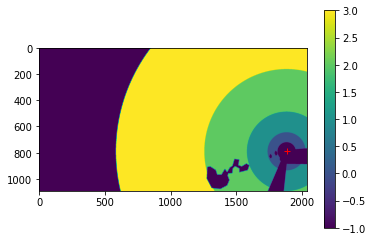

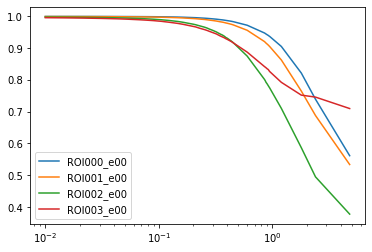

In [15]:
%%time

SALS_reload = LS.LoadFromConfig(os.path.join(froot, 'out', 'SALSconfig_modif.ini'))

print(SALS_reload)
plt.imshow(SALS_reload.ROIs)
plt.plot(*SALS_reload.centerPos, 'r+')
plt.colorbar()

g2m1_data, lagtimes, imgtimes, ROI_list, exptime_list = iof.OpenG2M1s(os.path.join(froot, 'out', 'reproc'))
fig, ax = plt.subplots()
for i in range(len(g2m1_data)):
    ax.plot(lagtimes[i][0][1:], g2m1_data[i][0][1:], label='ROI'+str(ROI_list[i]).zfill(3)+'_e'+str(exptime_list[i]).zfill(2))
ax.set_xscale('log')
ax.legend()